911 Calls capstone Project

In [1]:
import numpy as np #importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('911.csv') #loading the dataframe
df 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


Check the info of the dataframe

In [3]:
#checking the columns, memory and data types in the dataframe
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.2 MB


Inspect the head of the dataframe

In [4]:
#checking the top 5 rows of the dataframe
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Is any data missing in our dataset?

In [5]:
df.isna().sum() #using isna() to return a boolean and using sum() to count how many values are missing

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

What are the top 5 zipcodes that phone 911 the most?

In [6]:
(df
    .zip #selecting zip column
    .value_counts() #counting the number of times a zipcode appears
    .head(5) #limiting the counts to the top 5
)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships that phone 911 the most?

In [7]:
(df
    .twp #selecting twp column
    .value_counts() #counting the number of times a town appears
    .head(5) # limit the counts to the top 5
)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Look at the title column, how many unique title codes are there?

In [8]:
(df
    .title #selecting title column
    .nunique() #using nunique function to count number of unique titles
)

110

Create two new columns from the title column and name them Reason and Department

In [9]:
#We must split the string on the colon and create two new headings in the DataFrame.
df[['Department','Reasons']] = df.title.str.split((':'), expand=True)
df #expand=True is used to move the two new series into the dataframe

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,VEHICLE ACCIDENT -
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,VEHICLE ACCIDENT -
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,FALL VICTIM
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,NAUSEA/VOMITING


What is the most common reason for a 911 call?

In [10]:
#I have produced two methods to solve this. Both produce the same output.
(df
    .title
    .apply(lambda df_:df_.split(':')[0]) #splitting the columns via colon and selecting first index
    .value_counts() #counting the number of values in the first index
)       

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

In [11]:
#The above question can also be answered by summing the new Series in the DataFrame.
(df
    .Department #selecting department column
    .value_counts() #counting the number of values in the DataFrame
)

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

Use Matplotlib and create a countplot of 911 calls

<AxesSubplot:title={'center':'Count of Reasons for Phoning 911'}, xlabel='Reason for Phoning 911', ylabel='Count'>

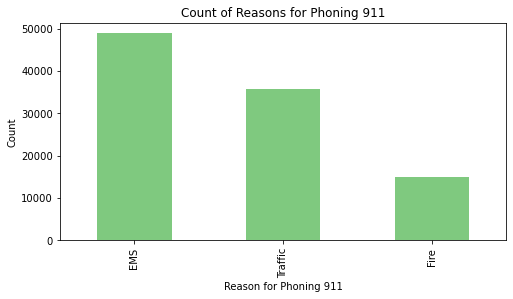

In [12]:
#plotting the counts with a bar chart using matplotlib.
(df
    .title
    .apply(lambda df_:df_.split(':')[0])
    .value_counts()
    .plot.bar(title='Count of Reasons for Phoning 911',figsize=(8,4),cmap = 'Accent',
             xlabel = 'Reason for Phoning 911', ylabel = 'Count')
)

Use Seaborn to create a countplot of 911 calls

Text(0.5, 1.0, 'Count of Department Phoning 911')

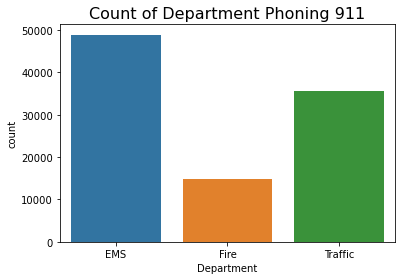

In [13]:
barplot = sns.countplot(data=df, x='Department')
barplot.set_title('Count of Department Phoning 911',size=16)

What is the data type of the objects in the timeStamp column?

In [14]:
type(df
    .timeStamp
    .loc[0] #selecting the first index of the timestamp series. We see the object is a string.
)

str

Convert the column from strings to DateTime objects

In [15]:
df['timeStamp'] = pd.to_datetime(df.timeStamp) #use pd.to_datetime to convert the column data from object to datetime
df.timeStamp #display the data

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

Create 3 new columns: Hour, Month & DayOfWeek

In [16]:
df['Month'] = df['timeStamp'].dt.month # create new col called month from timeStamp col using datetime library
df['DayOfWeek'] = df['timeStamp'].dt.dayofweek #as above but with dayofweek
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour) #using lambda function to perform the same operation
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reasons,Month,DayOfWeek,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,12,3,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,12,3,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,12,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,VEHICLE ACCIDENT -,8,2,11
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,VEHICLE ACCIDENT -,8,2,11
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,FALL VICTIM,8,2,11
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,NAUSEA/VOMITING,8,2,11


Use .map() with a dictionary to map the actual string names to the day of the week e.g index = 0 is Monday, index = 6 is Sunday

In [17]:
df['DayOfWeek'] = df.DayOfWeek.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',
                           4:'Friday',5:'Saturday',6:'Sunday'})
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reasons,Month,DayOfWeek,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,12,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,12,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,12,Thursday,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,12,Thursday,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,12,Thursday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,VEHICLE ACCIDENT -,8,Wednesday,11
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,VEHICLE ACCIDENT -,8,Wednesday,11
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,FALL VICTIM,8,Wednesday,11
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,NAUSEA/VOMITING,8,Wednesday,11


Use Seaborn to create a countplot of the DayOfWeek column with the hue based off of the Department column

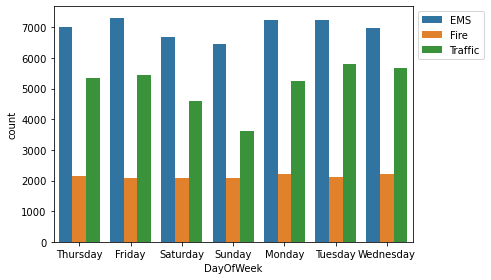

In [18]:
sns.countplot(data=df,hue='Department',x='DayOfWeek') #use our df for data, use dayofweek as x col and count the department data
plt.tight_layout() #using tight to prevent text from labels overlapping each other
plt.legend(bbox_to_anchor=(1,1)) #use bbox (1,1) to stop the legend box obscuring results

Use Seaborn to create a countplot of the Month column with the hue based off of the Department column

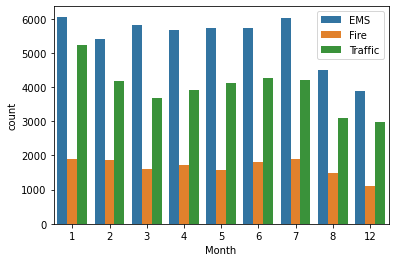

In [19]:
sns.countplot(data=df,hue='Department',x='Month') #as above, but we are counting the calls per month
plt.legend(bbox_to_anchor=(1,1)) #use bbox = (1,1) to stop the legend box obscuring results

The plot above is missing rows 9-11. Create a groupby object called byMonth, where the data is grouped by the month column and use count() method for aggregation. Use the head() method on this returned FataFrame.

In [20]:
byMonth = (df
    .groupby('Month') #group the dataframe by the Month column
    .agg('count') #aggregate the data using count
)
byMonth.head(5) #created variable byMonth and displayed top 5 rows

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reasons,DayOfWeek,Hour
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


Create a simple plot off of the DataFrame indicating the count of calls per month

<AxesSubplot:xlabel='Month'>

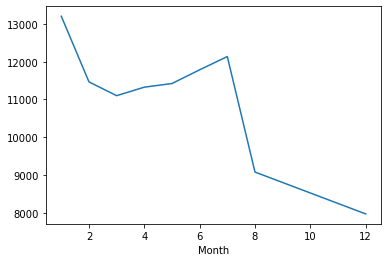

In [21]:
(byMonth['Department'] # I selected the department column to highlight the calls per month
    .plot.line(legend=None) #in retrospect, I could have chosen any to highlight this.
) #I set the legend = None as it inflilrated the box making the plot unintelligible

Use Seaborn to create a linear fit of calls per month.

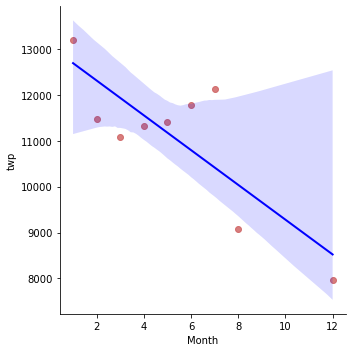

In [22]:
sns.lmplot(data=byMonth.reset_index(),x='Month',y='twp', #reset index to ensure the x arguement is actually a string in the column of the dataframe
          scatter_kws={'marker':'o','color':'indianred'}, #setting nodes to an 'o' and colour red
          line_kws={'linewidth':2,'color':'blue'}) #setting the linewidth to 2 and colour to blue

Create a new column called 'Date' that contains the date from the timeStamp column

In [23]:
df['Date'] = df['timeStamp'].dt.date #creating a new column called date using datetime library
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reasons,Month,DayOfWeek,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,12,Thursday,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,12,Thursday,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,12,Thursday,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,12,Thursday,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,12,Thursday,17,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,VEHICLE ACCIDENT -,8,Wednesday,11,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,VEHICLE ACCIDENT -,8,Wednesday,11,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,FALL VICTIM,8,Wednesday,11,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,NAUSEA/VOMITING,8,Wednesday,11,2016-08-24


Groupby this Date column with the count aggregate and create a plot of counts of 911 calls

In [24]:
PlotDate = (df
    .groupby('Date')
    .agg('count')
           )
PlotDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reasons,Month,DayOfWeek,Hour
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389


<AxesSubplot:xlabel='Date'>

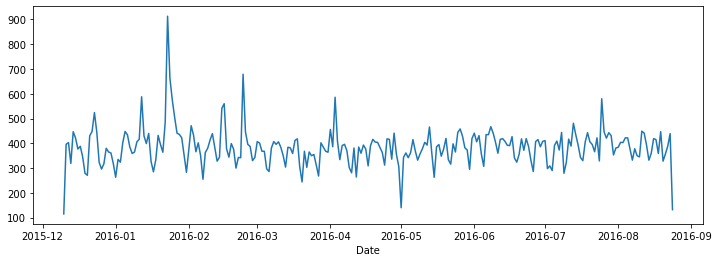

In [25]:
(PlotDate['Department'] #plotting the date by department phone calls
    .plot.line(legend=None,figsize=(12,4))) #using line graph, removing the legend and using
#larger fig size to clearly include all data

Now recreate the plot above but create 3 seperate plots with each plot representing a Reason to phone 911

<AxesSubplot:title={'center':'Count of EMS Calls'}, xlabel='Date'>

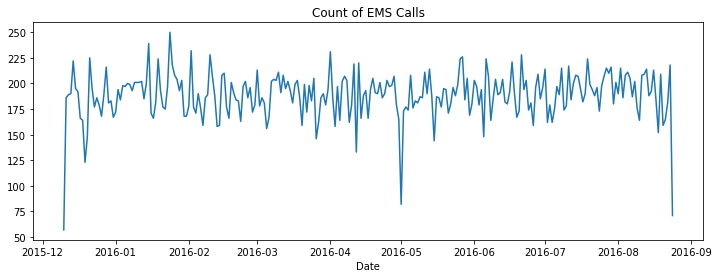

In [26]:
df_EMS = df[df['Department']== 'EMS'] #Select where Department = EMS in our df 
df_EMS1 = (df_EMS #create variable 
    .groupby('Date') #group by the Date
    .agg('count')) #aggregate our data by counting
df_EMS1['Department'].plot.line(legend=None,figsize=(12,4), #select new df and plot a line graph
                               title='Count of EMS Calls') #no legend, extended fig size & title

<AxesSubplot:title={'center':'Count of Fire Calls'}, xlabel='Date'>

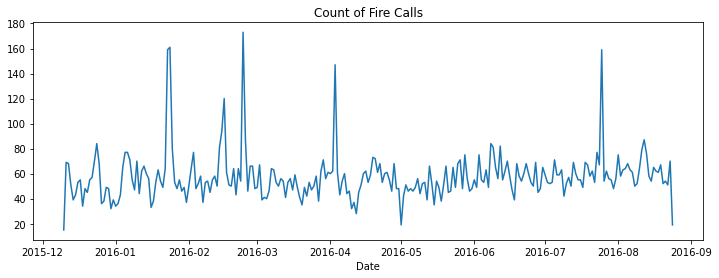

In [27]:
df_Fire = df[df['Department']== 'Fire'] # as above
df_Fire1 = (df_Fire
    .groupby('Date')
    .agg('count'))
df_Fire1['Department'].plot.line(legend=None,figsize=(12,4),
                                title='Count of Fire Calls') 

<AxesSubplot:title={'center':'Count of Traffic Calls'}, xlabel='Date'>

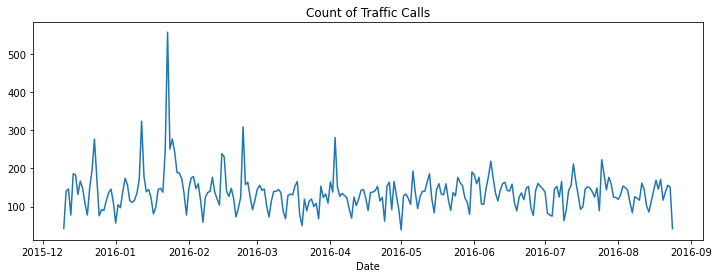

In [28]:
df_Traffic = df[df['Department']== 'Traffic'] #as above
df_Traffic1 = (df_Traffic
    .groupby('Date')
    .agg('count'))
df_Traffic1['Department'].plot.line(legend=None,figsize=(12,4),
                                   title='Count of Traffic Calls')

Next, it is time to create heatmaps using Seaborn. The DataFrame must be re-structred first, so that the columns become the Hours and the Index becomes the Day of the Week.

In [29]:
Plot_Hour = (df
    .groupby(['DayOfWeek','Hour']) #group by hour and day of week
    .agg('count') #aggregate the counts
    .Reasons #Select only the Reasons column
    .unstack(level=-1) #use unstack in heirerchal indexing to pivot the Hour data 
)
Plot_Hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Create a HeatMap using this new DataFrame

<AxesSubplot:xlabel='Hour', ylabel='DayOfWeek'>

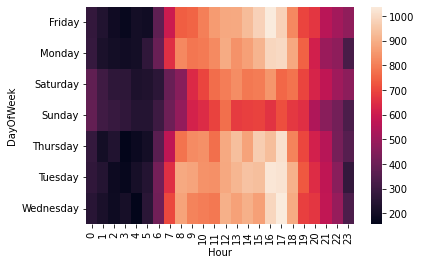

In [30]:
sns.heatmap(Plot_Hour,annot=False) #using SeaBorn to create a heatmap of our data without annotations

Create a clustermap using this DataFrame

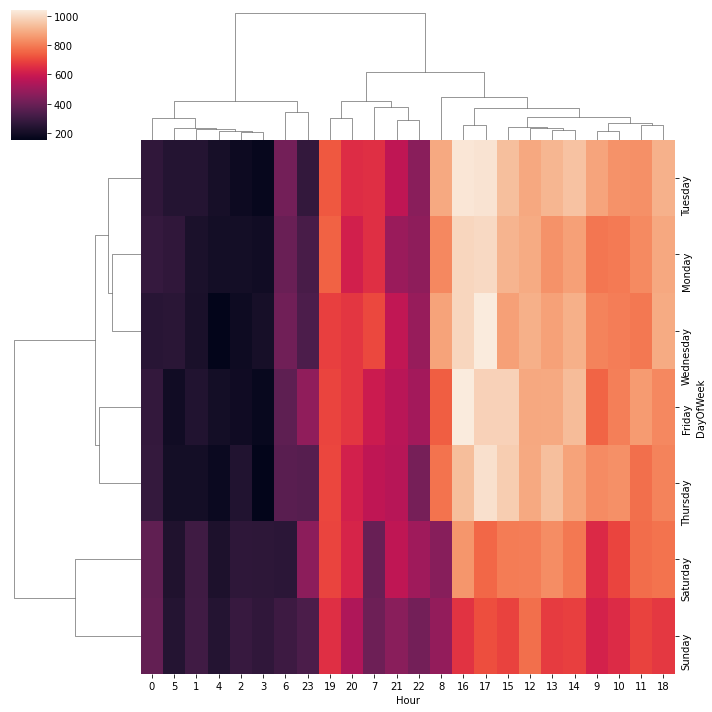

In [32]:
sns.clustermap(Plot_Hour,annot=False) #Using Seaborn to create clustermap without annotations

Repeat these same plots and operations, for a DataFrame that shows the Month as the column

In [33]:
Plot_Month = (df
    .groupby(['DayOfWeek','Month']) #group by hour and day of week
    .agg('count') #aggregate the counts
    .Reasons
    .unstack(level=-1) #use unstack in heirerchal indexing to pivot the Month data 
)
Plot_Month

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='DayOfWeek'>

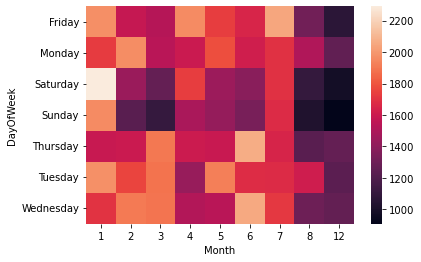

In [34]:
sns.heatmap(Plot_Month)

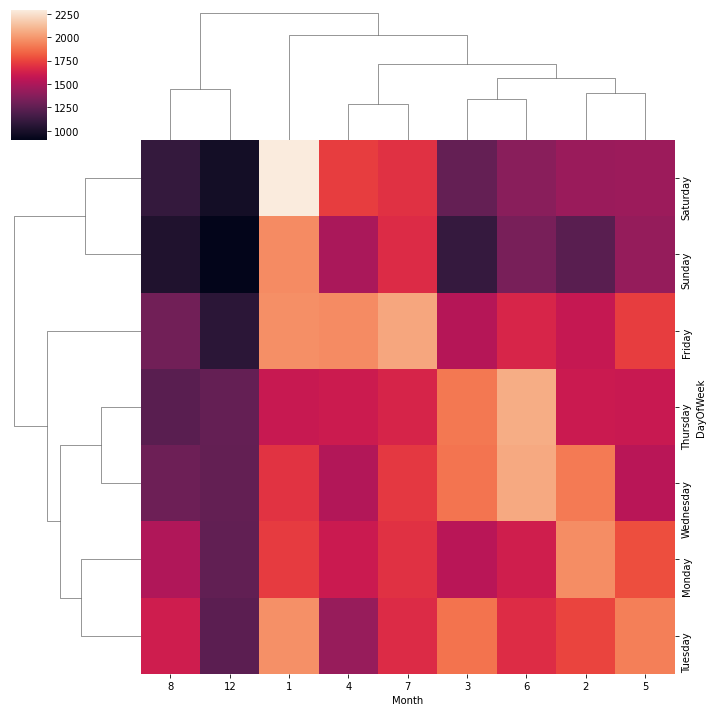

In [35]:
sns.clustermap(Plot_Month)

How much memory can be saved by tweaking the DataFrame?

In [36]:
df.info(memory_usage='deep')
#memory usage is at 62.1mb and the speed is 142ms


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lat         99492 non-null  float64       
 1   lng         99492 non-null  float64       
 2   desc        99492 non-null  object        
 3   zip         86637 non-null  float64       
 4   title       99492 non-null  object        
 5   timeStamp   99492 non-null  datetime64[ns]
 6   twp         99449 non-null  object        
 7   addr        98973 non-null  object        
 8   e           99492 non-null  int64         
 9   Department  99492 non-null  object        
 10  Reasons     99492 non-null  object        
 11  Month       99492 non-null  int64         
 12  DayOfWeek   99492 non-null  object        
 13  Hour        99492 non-null  int64         
 14  Date        99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 62

In [37]:
def tweak_calls(df): #creating tweak function
    def obj_to_cat(df_): #creating object to category function
        cols = df_.select_dtypes('object') #create variable cols to be looped over in return statement
        return (df_
               .astype({col:'category' for col in cols})) #iterate over our columns
    return (df
           .astype({'e':'uint8','Month':'uint8','Hour':'uint8'}) #converty int64 to uint8 using dict
           .pipe(obj_to_cat)) #pipe our function above
tweak_calls(df).info(memory_usage='deep')
#we save 66% of our memory by converting from objective dtypes to categorical dtypes and by converting
#int64 to uint8 datatypes. This protcol runs slightly slower, but that will be due to the size of the
#DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lat         99492 non-null  float64       
 1   lng         99492 non-null  float64       
 2   desc        99492 non-null  category      
 3   zip         86637 non-null  float64       
 4   title       99492 non-null  category      
 5   timeStamp   99492 non-null  datetime64[ns]
 6   twp         99449 non-null  category      
 7   addr        98973 non-null  category      
 8   e           99492 non-null  uint8         
 9   Department  99492 non-null  category      
 10  Reasons     99492 non-null  category      
 11  Month       99492 non-null  uint8         
 12  DayOfWeek   99492 non-null  category      
 13  Hour        99492 non-null  uint8         
 14  Date        99492 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(3), uint8(3)
memory usage: 